In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [3]:
dataset = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
#Remove Serial Number
dataset.drop("sl_no", axis=1, inplace=True)
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
dataset.profile_report(title='Campus Placement Data - Report')


# #We Will do some analysis for the data for particular columns with our dependent variable status

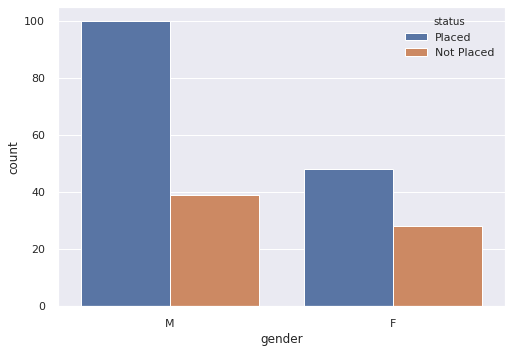

In [5]:
sns.set(style="darkgrid")
sns.countplot(x = 'gender' , hue = 'status' , data = dataset)
plt.show()


# Here we can see males are getting more placement than females 

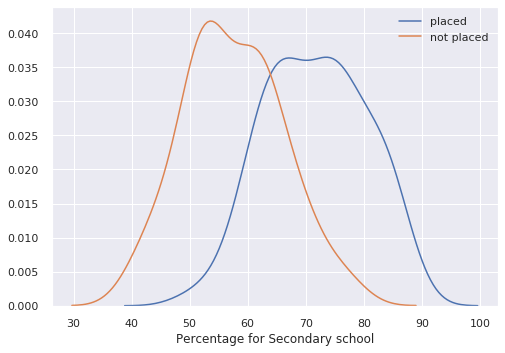

In [6]:
sns.kdeplot(dataset.ssc_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.ssc_p[ dataset.status=="Not Placed"])
plt.legend(["placed" , "not placed"])
plt.xlabel("Percentage for Secondary school")
plt.show()


For the secondary education We can see there is an intersection at 65% but the students who have more more than 75% in secondary education have higher chance of getting placed


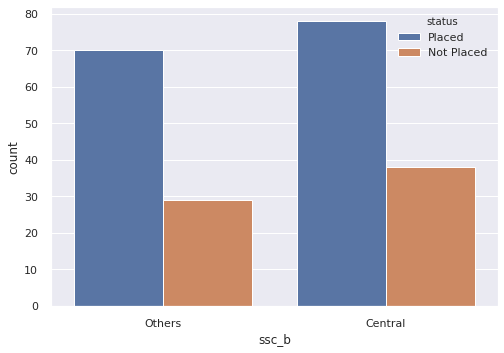

In [7]:
sns.set(style="darkgrid")
sns.countplot(x = 'ssc_b' , hue = 'status' , data = dataset)
plt.show()


Boards doesnt seem to have much impact on placement as there are in equal ratios

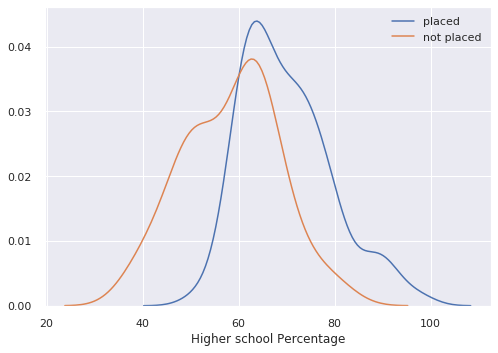

In [8]:
sns.kdeplot(dataset.hsc_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.hsc_p[ dataset.status=="Not Placed"])
plt.legend(["placed" , "not placed"])
plt.xlabel("Higher school Percentage")
plt.show()

From Higher school percentage we can say that Students whor are getting more than 78% are getting placed

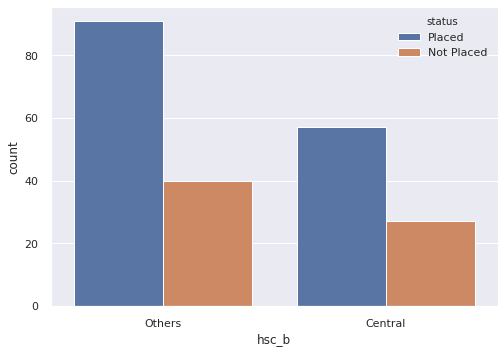

In [9]:
sns.set(style="darkgrid")
sns.countplot(x = 'hsc_b' , hue = 'status' , data = dataset)
plt.show()

In [ ]:
Higher School board doesnt have much effect on placements

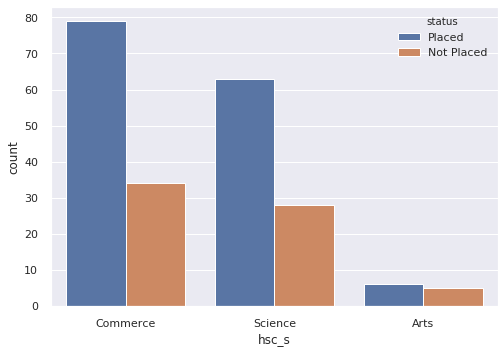

In [10]:
sns.set(style="darkgrid")
sns.countplot(x = 'hsc_s' , hue = 'status' , data = dataset)
plt.show()

We can see Students who choose Commerce and Science are getting more placements than Students in Arts 

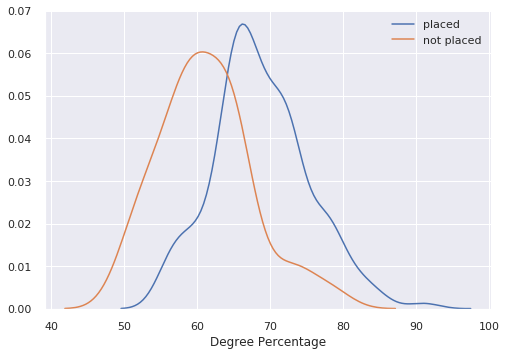

In [11]:
sns.kdeplot(dataset.degree_p[ dataset.status=="Placed"])
sns.kdeplot(dataset.degree_p[ dataset.status=="Not Placed"])
plt.legend(["placed" , "not placed"])
plt.xlabel("Degree Percentage")
plt.show()


From Degree Percentage we can conclude students who are getting more than 78% have a good chance of getting placed

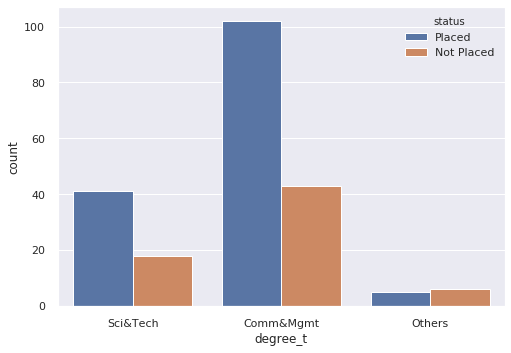

In [12]:
sns.set(style="darkgrid")
sns.countplot(x = 'degree_t' , hue = 'status' , data = dataset)
plt.show()


Here we can see the area of degree plays an significant role of determining placements

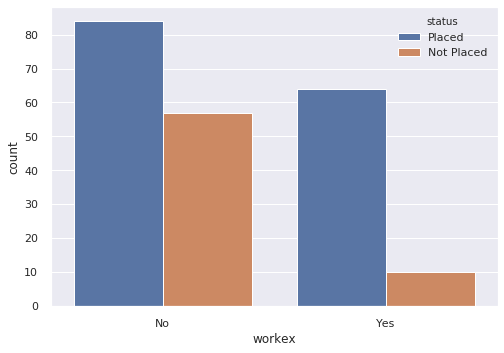

In [13]:
sns.set(style="darkgrid")
sns.countplot(x = 'workex' , hue = 'status' , data = dataset)
plt.show()

As we can see there are very few people who have experience and are not getting placed.

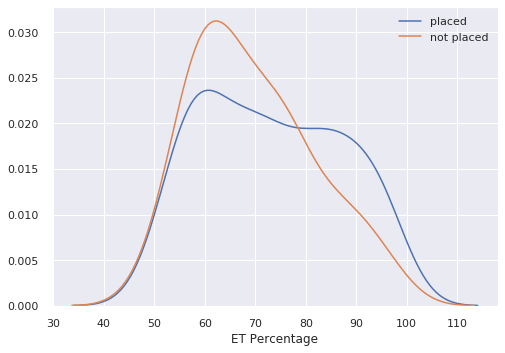

In [14]:
sns.kdeplot(dataset.etest_p[dataset.status=="Placed"])
sns.kdeplot(dataset.etest_p[dataset.status=="Not Placed"])
plt.legend(["placed" , "not placed"])
plt.xlabel("ET Percentage")
plt.show()

Employing Test Percaentage seems to have no effect on Placement status

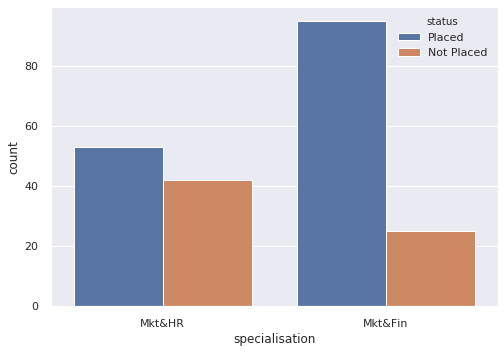

In [15]:
sns.set(style="darkgrid")
sns.countplot(x = 'specialisation' , hue = 'status' , data = dataset)
plt.show()

Students from Mkt and finance are getting more placements

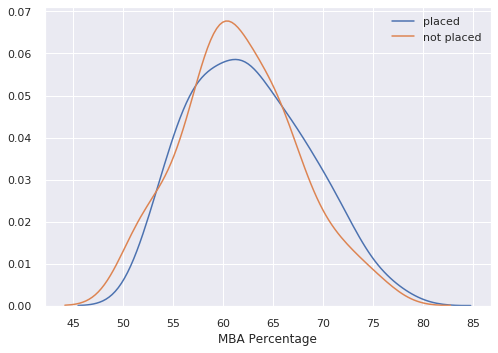

In [16]:
sns.kdeplot(dataset.mba_p[dataset.status=="Placed"])
sns.kdeplot(dataset.mba_p[dataset.status=="Not Placed"])
plt.legend(["placed" , "not placed"])
plt.xlabel("MBA Percentage")
plt.show()


MBA Percentage does not have much effects on placements

Fromabove we can see that the factors which play a major role in placements are :-
Gender
ssc_p
hsc_p
hsc_s
degree_p
degree_t
workex
specialisation



We will make a logistic regression model on this to predict placement
Lets clean the data


In [17]:

y = dataset.iloc[: ,[12]].values
dataset.drop(['salary' , 'ssc_b' , 'hsc_b' , 'mba_p' ,'status' ,'etest_p',
                 ]  
             , axis = 1 , inplace = True)
dataset.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,Mkt&HR
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin


Above are the variables that we need


In [18]:
df1 = pd.get_dummies(dataset['specialisation'], drop_first = True)
df2 = pd.get_dummies(dataset['workex'], drop_first = True)
df3 = pd.get_dummies(dataset['degree_t'], drop_first = True)
df4 = pd.get_dummies(dataset['gender'], drop_first = True)
df5 = pd.get_dummies(dataset['hsc_s'], drop_first = True)



In [19]:
dataset = pd.concat([df1,df2,df3,df4,df5,dataset] , axis = 1)
dataset.drop(['workex' , 'specialisation' ,'hsc_s','gender','degree_t'] , inplace  = True , axis = 1)
dataset.head()


,Mkt&HR,Yes,Others,Sci&Tech,M,Commerce,Science,ssc_p,hsc_p,degree_p
0,1,0,0,1,1,1,0,67.00,91.00,58.00
1,0,1,0,1,1,0,1,79.33,78.33,77.48
2,0,0,0,0,1,0,0,65.00,68.00,64.00
3,1,0,0,1,1,0,1,56.00,52.00,52.00
4,0,0,0,0,1,1,0,85.80,73.60,73.30


In [20]:
X = dataset.iloc[:, [0,1,2,4,3,5,6,7,8,9]].values
print(X)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[[ 1.    0.    0.   ... 67.   91.   58.  ]
 [ 0.    1.    0.   ... 79.33 78.33 77.48]
 [ 0.    0.    0.   ... 65.   68.   64.  ]
 ...
 [ 0.    1.    0.   ... 67.   67.   73.  ]
 [ 1.    0.    0.   ... 74.   66.   58.  ]
 [ 1.    0.    0.   ... 62.   58.   53.  ]]
[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[1.         0.         0.         ... 0.53823954 0.88962109 0.19512195]
 [0.         1.         0.         ... 0.79241394 0.68088962 0.6702439 ]
 [0.         0.         0.         ... 0.49701093 0.5107084  0.34146341]
 ...
 [0.         1.         0.         ... 0.53823954 0.49423394 0.56097561]
 [1.         0.         0.         ... 0.68253968 0.47775947 0.19512195]
 [1.         0.         0.         ... 0.43516801 0.34596376 0.07317073]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
ac = accuracy_score(y_test, y_pred)
print(ac)
print(classification_report(y_test, y_pred))


0.9259259259259259
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.97      0.95        38

    accuracy                           0.93        54
   macro avg       0.93      0.89      0.91        54
weighted avg       0.93      0.93      0.92        54

